### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

pokemon = pd.read_csv("../pokemon.csv", sep=",")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


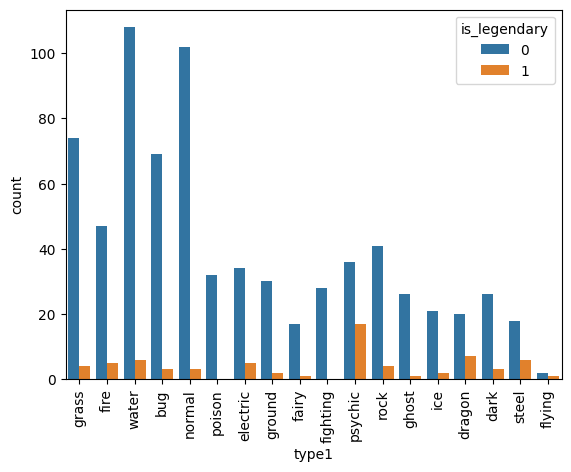

In [29]:
# type1 VS legendary
sns.countplot(x='type1', hue='is_legendary', data=pokemon)
plt.xticks(rotation=90)
plt.show()

Er lijkt geen correlatie tussen type1 en legendary te zitten. Wel heb je bij sommige types uitschieters. Of dit nu echt een verband is weet ik niet precies.

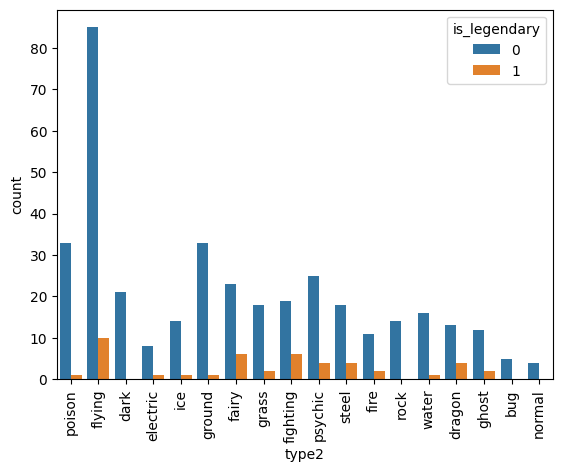

In [30]:
# type2 VS legendary
sns.countplot(x='type2', hue='is_legendary', data=pokemon)
plt.xticks(rotation=90)
plt.show()

Er lijkt geen correlatie tussen type2 en legendary te zitten. Bij hoger pieken van niet-legendary heb je ook een hoge piek van wel-legendary.

In [31]:
from scipy.stats import chi2_contingency

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

def check_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [32]:
contingencyTable = create_contingency_table(pokemon, 'is_legendary','type1')

contingencyTable

is_legendary,0,1
type1,,
bug,69,3
dark,26,3
dragon,20,7
electric,34,5
fairy,17,1
fighting,28,0
fire,47,5
flying,2,1
ghost,26,1


<AxesSubplot: xlabel='type1'>

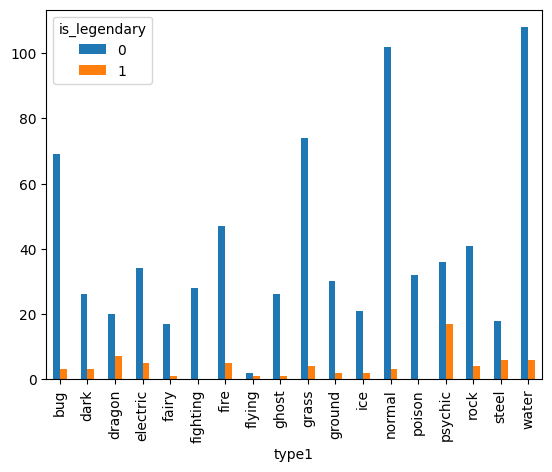

In [33]:
contingencyTable.plot(kind='bar')

Het type psychic zijn er veel legendary. Dit kan wel eens een correlatie hebben.

In [34]:
check_correlation(pokemon, 'type1', 'is_legendary')

The odds of a correlation between type1 and is_legendary is 99.9999995467418% (Based on a p value of 4.532581978427316e-09).
This percentage needs to be at least 95% for a significant correlation.


De Chi2 test bevestigt dat er een correlatie aanwezig is.

In [35]:
contingencyTable = create_contingency_table(pokemon, 'is_legendary','type2')

contingencyTable

is_legendary,0,1
type2,,
bug,5,0
dark,21,0
dragon,13,4
electric,8,1
fairy,23,6
fighting,19,6
fire,11,2
flying,85,10
ghost,12,2


<AxesSubplot: xlabel='type2'>

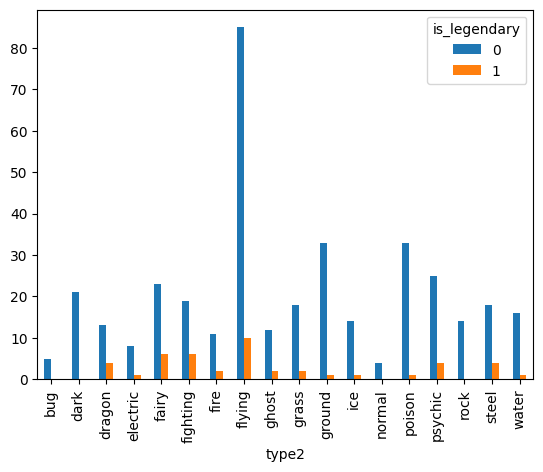

In [36]:
contingencyTable.plot(kind='bar')

Ik zie geen opmerkelijke correlatie. Bij hoge pieken heb je ook veel legendary. Dat lijkt mij logisch.

In [37]:
check_correlation(pokemon, 'type2', 'is_legendary')

The odds of a correlation between type2 and is_legendary is 84.1298006223832% (Based on a p value of 0.158701993776168).
This percentage needs to be at least 95% for a significant correlation.


De Chi2 test bevestigt dat er geen grote correlatie aanwezig is.